# Bank Credit Classification Problem


First we will import some libraries first for data handling, visualization and feature engineering.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
data = pd.read_csv('../input/hmeq-data/hmeq.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


We see that there are a total of 5,960 data entries in the dataset. Below are definitions of the variables:

* BAD - Dependent binary variable wheather client defaulted on loan or fully repaid

Independent variables
*  LOAN - Amount of the loan request
*  MORTDUE - Amount due on existing mortgage
*  VALUE - Value of current property
*  REASON - Reason for loan request
*  JOB - Occupation
*  YOJ - Years at present job
*  DEROG - Number of major derogatory reports
*  DELINQ - Number of delinquent credit lines
*  CLAGE - Age of oldest trade line in months
*  NINQ - Number of recent credit lines
*  CLNO - Number of credit lines
*  DEBTINC - Debt-to-income ratio

Let's print out several lines of the dataset as well as output some descriptive statistics and see what it looks like

In [4]:
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [5]:
data.describe(include ='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


We see that there are some missing data. We also see that we are dealing with only two categorical variables Reason (2 unique entries) and Job (6 unique entries). Next we will quantify the missing values for each variable.

In [6]:
missing = pd.DataFrame()
missing['Total missing'] = data.isnull().sum()
missing['%'] = data.isnull().sum()/len(data.index)*100
missing['%'] = missing['%'].round(1)
missing

,Total missing,%
BAD,0,0.0
LOAN,0,0.0
MORTDUE,518,8.7
VALUE,112,1.9
REASON,252,4.2
JOB,279,4.7
YOJ,515,8.6
DEROG,708,11.9
DELINQ,580,9.7
CLAGE,308,5.2


We see that variables DEROG and DEBTINC has over 10% of missing values out of 5,960 entries. Now let's visualize each of the variables.

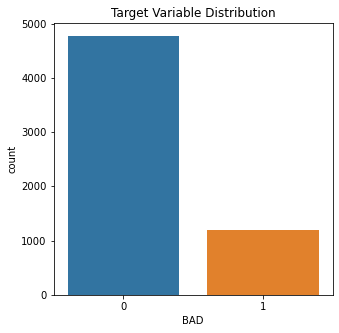

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(data['BAD']).set_title("Target Variable Distribution")
plt.show()

Here 1 = client defaulted on loan, 0 = loan repaid.
Based on target variable ditribution plot we see that our data is highly imbalanced. This could lead to a so called "accuracy paradox" in which our model outputs mostly 0 because it has been trained to do so. Machine learning algorithms are built to minimize errors. A good explanation of the "accuracy paradox" can be read here https://medium.com/datadriveninvestor/accuracy-paradox-87b1dfe07ca7

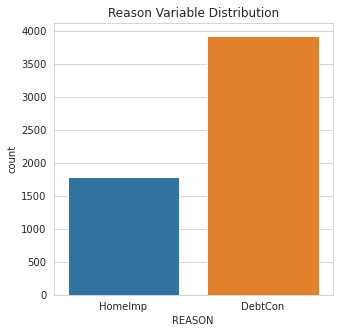

In [8]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.countplot(data['REASON']).set_title("Reason Variable Distribution")
plt.show()

DebtCon = debt consolidation, HomeImp = home improvement

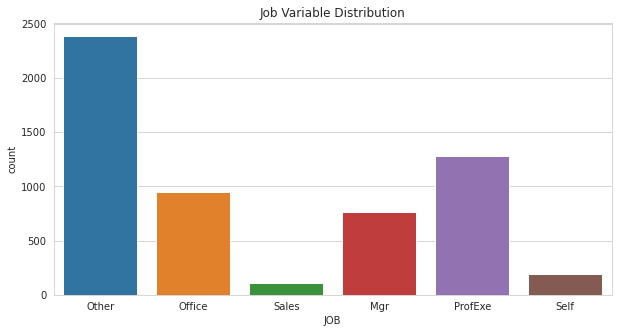

In [9]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(data['JOB']).set_title("Job Variable Distribution")
plt.show()

In [10]:
numerical_cols = [x for x in data.columns if data[x].dtype in ['int', 'float']]
num = data[numerical_cols]

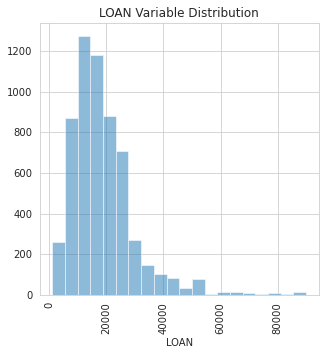

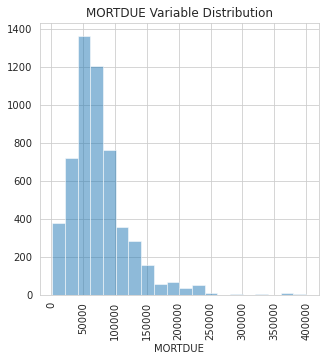

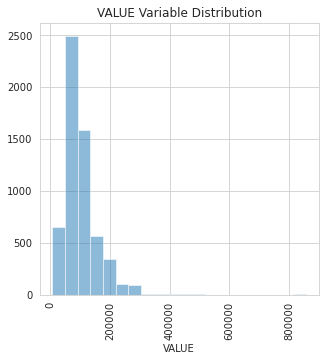

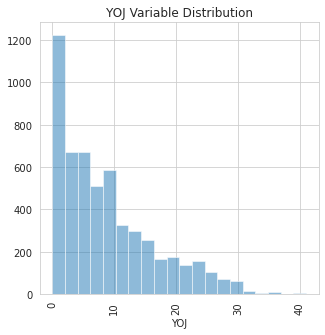

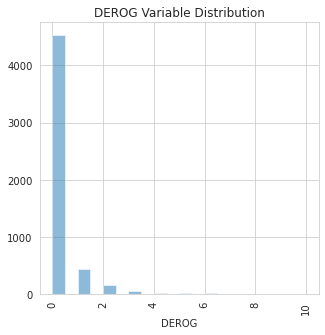

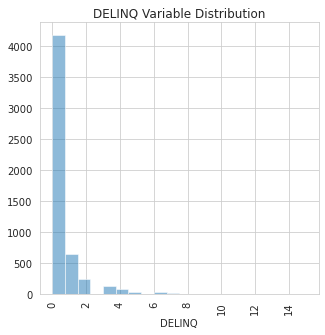

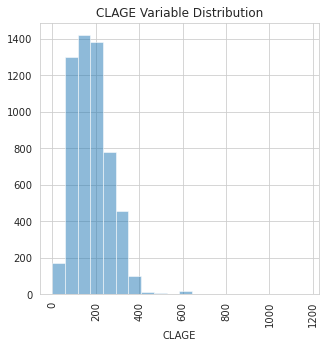

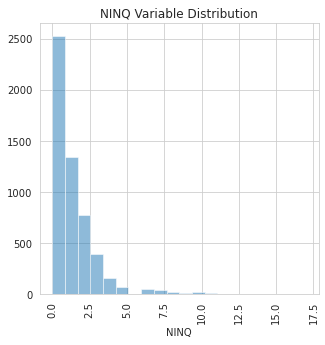

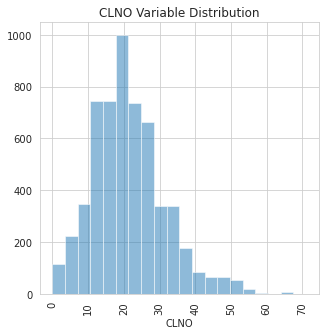

In [11]:
sns.set_style("whitegrid")

for i , k in zip(numerical_cols[1:], range(1,len(numerical_cols)-1)):
    plt.figure(figsize=(5,5))
    sns.distplot(data[i], kde=False,bins=20, hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": 0.5}).set_title("{col_name} Variable Distribution".format(col_name = i))
    plt.xticks(rotation=90)
plt.show()

From the graphs above there are some outliers for some of the variables. We will try to deal with outliers by scaling the data.

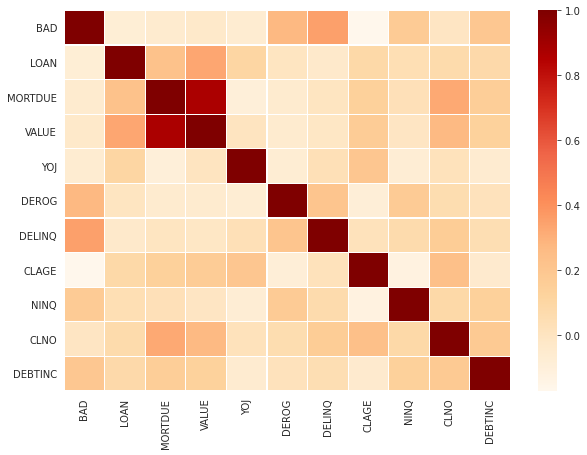

In [12]:
corr = data.corr()

# plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="OrRd")

Matrix above is a color-encoded matrix which shows the correlation between variables. Darker colors  shows higher correlation compared to lighter colors. Based on the matrix we see that DELINQ, DEROG and NINQ variables, related to credit history, are mostly correlated with dependent target variable BAD.

Now we will fill in missing values with forward-fill and backward-fill.

In [13]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

Here we will onehot categorical variables

In [14]:
y = data['BAD']
X = data.drop(['BAD'], axis=1)
X = pd.get_dummies(X)

We will now scale the data using Robust Scaler. The nice feature of this scaler is that it is robust to outliers. 

In [15]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(10, 90))
X_scaled = rs.fit_transform(X)

Now we oversample the minority class (1 = client defaulted on loan) using Synthetic Minority Oversampling Technique or SMOTE for short. 

Using TensorFlow backend.


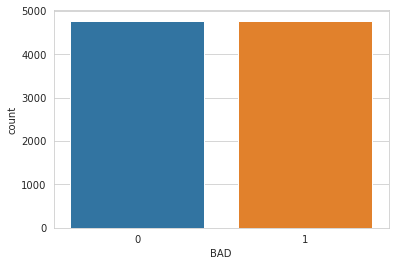

In [16]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=0)
X_resampled, y_resampled = smo.fit_resample(X_scaled, y)
sns.countplot(y_resampled)
plt.show()

Splitting dataset to train and validation

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=101)

Import additional libraries for model training and predicting

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

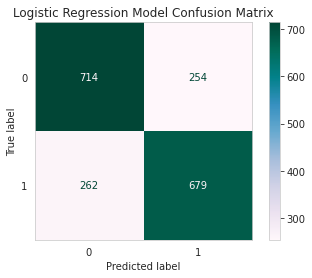

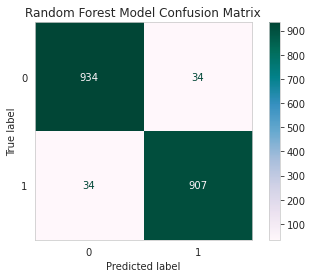

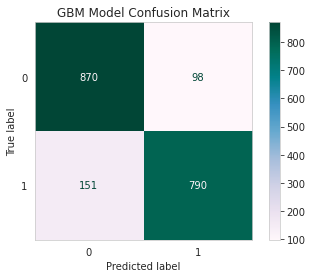

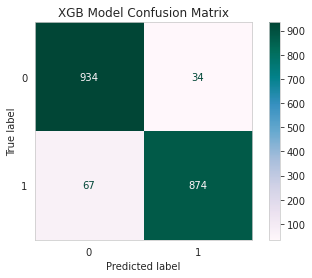

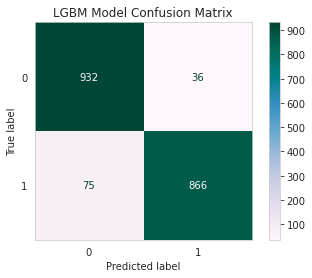

In [19]:
# Creating a list of regressors to loop through
models = [('Logistic Regression', LogisticRegression(random_state=0)),
         ('Random Forest', RandomForestClassifier(random_state=0)),
         ('GBM', GradientBoostingClassifier(random_state=0)),
         ('XGB', XGBClassifier(random_state=0)),
         ('LGBM', LGBMClassifier())
         ]
score = []
skf = StratifiedKFold(n_splits=6)

for (name, model) in models:
    # Training and fitting the model
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    
    # Predicting dependent variable using validation data
    predictions = my_model.predict(X_valid)
    
    # Calculating accuracy of the model and storing in the score list
    accuracy = accuracy_score(y_valid, predictions) 
    score.append({'Model': name,'Accuracy': accuracy})
    
    # Plotting non-normalized confusion matrix
    plot_confusion_matrix(my_model, X_valid, y_valid, values_format = 'd', cmap=plt.cm.PuBuGn, xticks_rotation = 'horizontal').ax_.set_title(str(name)+' Model Confusion Matrix')
    plt.grid(False)

plt.show()   

score = pd.DataFrame(score)

Now let's print out the results of our 5 models

In [20]:
score

,Model,Accuracy
0,Logistic Regression,0.729701
1,Random Forest,0.964379
2,GBM,0.869565
3,XGB,0.947093
4,LGBM,0.941854


Let's plot the feature importance chart for our LGBM model and see what features have the highest weight in the model.

Text(0.5, 0, 'FEATURE IMPORTANCE')

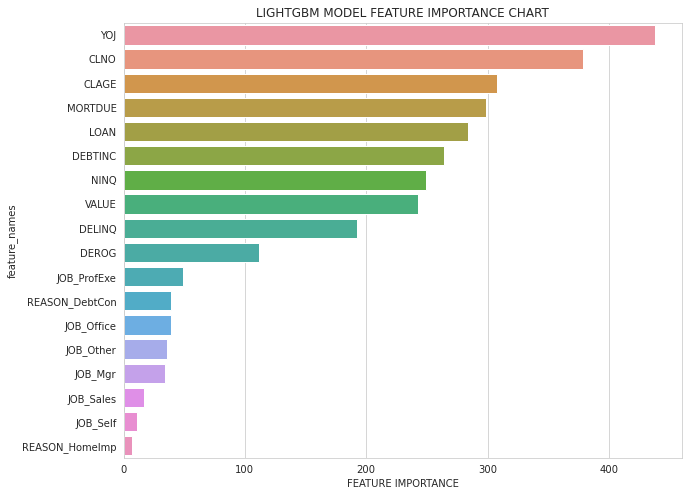

In [21]:
# Define feature importance and feature names
importance = my_model.best_estimator_.feature_importances_
names = X.columns
# Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(names)

# Create a DataFrame using a Dictionary and sort in decreasing order
feature_dict={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(feature_dict)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

# Plot Searborn bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('LIGHTGBM MODEL FEATURE IMPORTANCE CHART')
plt.xlabel('FEATURE IMPORTANCE')

# Conclusion

We can see that we get an excellent result with Random Forest, XGB and LightGBM models with little data manipulations and no hyperparameter tuning. This type of data and classification model could be used to predict clients who will default on their bank loan and start an early process of soft collection. 